# Gold Price Predicton

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')

### Importing dataset

In [2]:
df = pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Calculating correlation

In [6]:
correlation = df.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


#### Visualizing the correlation in heatmap 

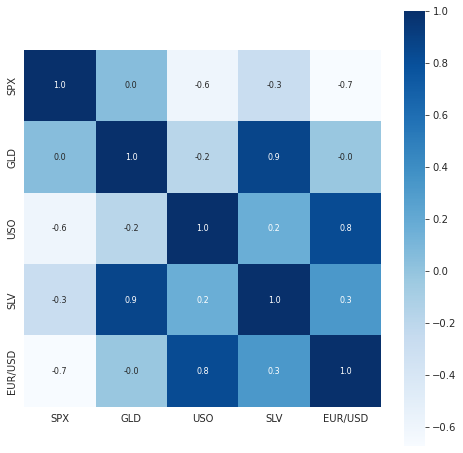

In [7]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, annot=True, fmt='.1f', annot_kws={'size': 8}, cmap='Blues')
plt.show()

#### Correlation values of GLD

In [8]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


### Checking the distribution of Gold price

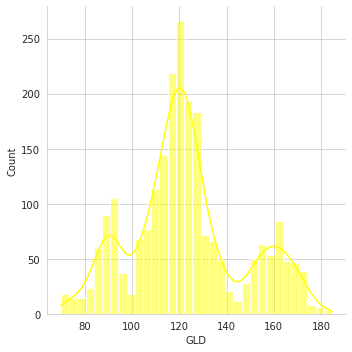

In [9]:
sns.displot(df['GLD'], kde=True, color='yellow')

### Relation between GLD and SPX

<Figure size 720x720 with 0 Axes>

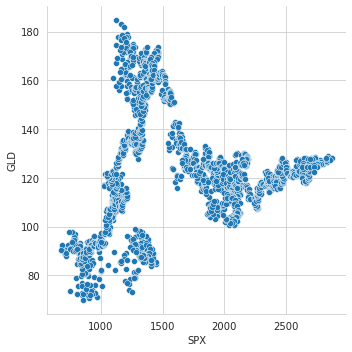

In [10]:
plt.figure(figsize=(10, 10))
sns.relplot(df.SPX, df.GLD)

### Relation between GLD and USO

<AxesSubplot:xlabel='USO', ylabel='GLD'>

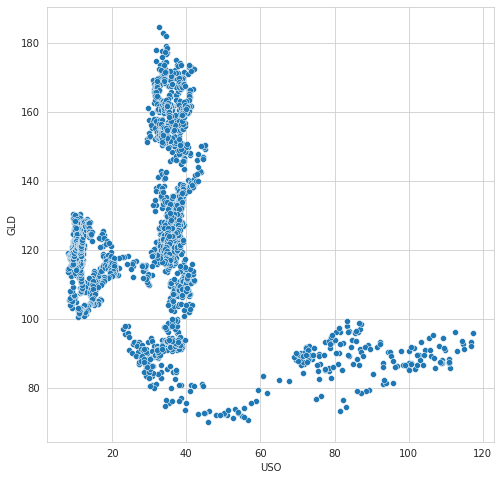

In [11]:
plt.figure(figsize=(8, 8))
sns.scatterplot(df.USO, df.GLD)

### Relation between GLD and SLV

<AxesSubplot:xlabel='SLV', ylabel='GLD'>

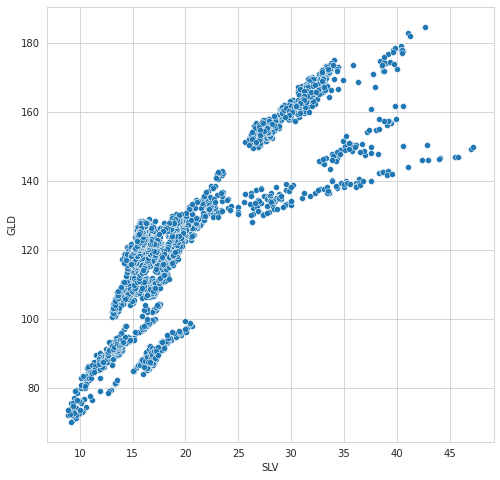

In [12]:
plt.figure(figsize=(8, 8))
sns.scatterplot(df.SLV, df.GLD)

### Relation between GLD and EUR/USD

<AxesSubplot:xlabel='EUR/USD', ylabel='GLD'>

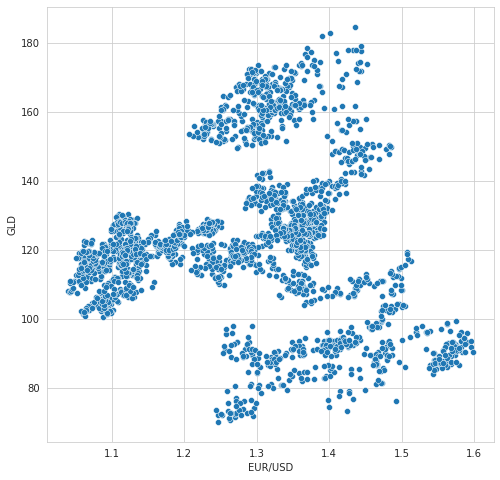

In [13]:
plt.figure(figsize=(8, 8))
sns.scatterplot(df['EUR/USD'], df.GLD)

### Splitting the dataset into independent and dependent variable

In [14]:
X = df.drop(['Date', 'GLD'], axis = 1)
y = df.GLD

### Splitting the dataset into training and test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Fitting the model with training dataset

#### Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
y_preds_train = rfr.predict(X_train)
y_preds_train

array([109.92569793, 114.77630074,  90.64729997, ..., 130.80399714,
       159.81839584, 114.88229959])

In [18]:
y_preds_test = rfr.predict(X_test)
y_preds_test

array([168.3736991 ,  82.15950018, 115.9930004 , 127.76170041,
       120.8771011 , 154.76409725, 150.39029946, 126.1447007 ,
       117.50399874, 125.88220116, 116.7985009 , 171.48540101,
       141.99379948, 168.18419875, 115.18250041, 117.58940002,
       138.19930359, 170.49240092, 158.8890032 , 159.85649954,
       155.15980033, 125.19479999, 175.38210029, 157.39270373,
       125.16470057,  93.83609967,  77.72689983, 120.45839991,
       119.09639926, 167.40119952,  87.97829999, 125.44800016,
        91.19140087, 117.79779994, 121.09959908, 135.81810035,
       115.42210117, 114.74510081, 147.27059951, 107.06580085,
       104.65340244,  87.24309794, 126.453401  , 118.06190023,
       152.04529926, 119.66699985, 108.41209969, 108.11739831,
        93.23930074, 126.94199833,  74.87030037, 113.60469879,
       121.28520006, 111.31549905, 118.82669904, 120.62669947,
       159.1479009 , 168.01570144, 146.99879649,  85.64219823,
        94.4709004 ,  86.82699867,  90.54950019, 118.91

In [19]:
train_score = rfr.score(X_train, y_train)
train_score

0.9984044969167458

In [20]:
test_score = rfr.score(X_test, y_test)
test_score

0.9891993337688667

## Trying out other different models

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [22]:
def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print('The predicted values:\n ', model.predict(X_test))
    print('\nThe accuracy score: ', model.score(X_test, y_test))

### 1. Linear Regression

In [23]:
fit_model(LinearRegression(), X_train, X_test, y_train, y_test)

The predicted values:
  [159.45290968  81.50858067 113.4868037  128.55153817 126.20403783
 141.31818338 165.49416492 124.44197659 113.95389904 122.9965895
 113.95492464 174.89529849 132.66890174 159.24793304 118.8791679
 122.14315717 150.37153054 161.27175405 152.2792036  162.19946709
 145.88372183 118.07669395 180.21729122 178.13331554 123.51701986
  98.82914322  76.63486248 119.38435511 113.85027665 159.25706609
  93.76037617 120.05334649  88.61086583 114.28801659 112.77954274
 144.19518102 118.78252489 115.87334354 144.06409553 113.81864246
 100.49676727  89.42842238 120.36720699 110.47635305 146.4894628
 119.30321261 110.99311348 111.3386287   96.48139076 123.40842816
  79.51413425 115.36111603 121.78896764 114.55367722 120.9074622
 117.10612464 152.31198525 182.7735091  196.73570503  91.06670951
 101.92097594  87.48443506  94.33158785 119.17357764 121.8935122
 125.85678089 163.2699701  122.91100556 113.55098736 104.06905043
 155.16775229 176.87972077 125.62460858 113.85896766 119.

### 2. Decision Tree Regressor

In [24]:
fit_model(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

The predicted values:
  [168.970001  81.360001 115.480003 126.339996 121.730003 155.669998
 149.149994 126.559998 117.389999 125.620003 117.959999 174.580002
 141.919998 167.179993 115.839996 116.5      134.100006 168.970001
 159.570007 132.850006 155.360001 126.610001 177.210007 157.320007
 125.459999  93.449997  77.559998 122.290001 119.220001 167.869995
  88.330002 124.769997  91.730003 118.639999 121.449997 135.410004
 114.57     115.800003 134.119995 105.720001 104.370003  87.220001
 127.489998 118.769997 157.779999 120.120003 107.980003 107.519997
  93.800003 128.539993  72.510002 113.260002 120.110001 110.809998
 118.360001 121.129997 161.320007 161.520004 146.869995  85.199997
  93.040001  86.879997  90.949997 120.07     126.139999 127.400002
 173.490005 122.970001 116.209999  97.550003 169.820007 142.050003
 132.490005 120.910004 122.739998 119.190002 113.910004 118.82
 106.260002 127.440002 114.769997 108.470001 115.57     119.699997
  89.910004  87.989998 142.380005 127.18  

### 4. Support Vector Regressor

In [25]:
fit_model(SVR(kernel='linear'), X_train, X_test, y_train, y_test)

The predicted values:
  [166.90464982  79.51033803 111.4007835  128.89892218 125.51314271
 144.81839424 175.14617178 125.0484506  114.03229897 125.35379954
 113.63561887 185.66352659 135.80257416 166.44857351 117.20739937
 121.12711344 156.74348012 168.82951967 158.49950685 170.65340816
 150.83383683 119.37684404 191.9766812  189.73002048 124.15550313
  98.22582989  73.2386913  121.45438058 113.96344989 166.05257711
  91.05994568 120.41011536  88.60361891 112.24495579 112.0256926
 149.29439749 117.30615225 114.55786728 148.85599602 111.60129867
  99.60857242  89.59941047 120.84926644 110.07738701 151.46337302
 121.14331635 108.98595636 109.02093857  98.14833471 126.00108601
  73.98285063 113.72600103 120.80494721 112.8268864  120.59120799
 117.88893898 158.88122858 195.015285   211.41774124  91.59679267
 103.21063064  87.52370472  92.04516641 118.84643412 122.59811597
 128.82534876 171.58791586 123.1311249  113.54929203 104.8068307
 162.18950863 188.42295956 128.73327567 113.63379061 1

### 5. XGB Regressor

In [26]:
fit_model(XGBRegressor(), X_train, X_test, y_train, y_test)

The predicted values:
  [167.99673   81.257    115.680504 128.40234  119.90543  154.21127
 147.662    125.648315 117.25356  126.00609  115.62989  171.755
 142.69296  165.95056  115.677155 117.85581  134.05186  170.32123
 155.57777  158.895    155.08844  126.040794 175.17639  154.82768
 125.294304  93.38418   75.03659  120.27448  119.14891  167.87407
  88.307594 124.14658   90.55532  118.48616  121.23947  141.665
 115.25906  113.90981  136.21347  108.42582  103.82606   87.17343
 127.023605 118.14248  152.48473  119.41017  111.29818  107.83849
  93.21376  127.51094   74.81875  112.99162  121.51871  111.21432
 118.99881  121.33489  163.32918  171.3393   146.78625   87.43396
  95.01052   87.585846  89.28714  118.76987  127.15954  127.46486
 172.55789  122.397545 116.96136   98.952446 168.39165  144.549
 132.06133  121.1305   121.24223  119.56889  114.47125  117.181244
 108.14827  128.25194  114.1622   104.08256  117.11536  119.84904
  90.03118   88.236015 146.78697  127.63485  113.02499  1